In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
df = pd.read_csv('./train.csv', sep=';', decimal=",", engine='python')

In [3]:
df.head(5)

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,...,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,...,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,...,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,...,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,...,28,17,5,69,23,86,28,0,0,0


In [4]:
df.shape

(514009, 27)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514009 entries, 0 to 514008
Data columns (total 27 columns):
C1        514009 non-null int64
C2        514009 non-null int64
C3        514009 non-null int64
N1        514009 non-null float64
N2        514009 non-null float64
N3        514009 non-null float64
N4        514009 non-null float64
N5        514009 non-null float64
N6        514009 non-null float64
N7        514009 non-null float64
N8        514009 non-null float64
N9        514009 non-null float64
N10       514009 non-null float64
N11       514009 non-null float64
N12       514009 non-null float64
N13       514009 non-null float64
N14       514009 non-null int64
N15       514009 non-null int64
N16       514009 non-null int64
N17       514009 non-null int64
N18       514009 non-null int64
N19       514009 non-null int64
N20       514009 non-null int64
N21       514009 non-null int64
N22       514009 non-null int64
N23       514009 non-null int64
TARGET    514009 non-null int64

In [6]:
print(f"C1: {len(df['C1'].unique())}")
print(f"C2: {len(df['C2'].unique())}")
print(f"C3: {len(df['C3'].unique())}")

C1: 514009
C2: 64
C3: 3


In [7]:
df.describe()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
count,5.140090e+05,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,...,514009.000000,514009.000000,514009.000000,514009.00000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000
mean,3.125269e+15,327890.745425,31.630411,44.571923,934.872724,2875.756859,108.307058,62.711117,12.868516,9.464795,...,29.079176,10.447070,7.747530,38.66520,21.243424,49.609273,29.059777,0.046978,0.019398,0.049307
std,8.589417e+14,51107.511245,0.929149,232.708320,2272.072942,4932.847144,197.771895,99.919667,19.511682,16.725490,...,31.241034,14.888752,11.964678,50.26614,24.155985,58.757945,31.233367,0.708441,0.349181,0.216507
min,3.530330e+05,3138.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.231393e+15,323531.000000,31.000000,0.000000,0.000000,0.000000,2.800000,9.580000,0.000000,0.220000,...,8.000000,0.000000,1.000000,2.00000,4.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,3.337374e+15,343230.000000,31.000000,0.000000,77.460000,109.600000,45.000000,33.020000,4.970000,3.300000,...,20.000000,5.000000,4.000000,21.00000,14.000000,32.000000,20.000000,0.000000,0.000000,0.000000
75%,3.437364e+15,343636.000000,33.000000,0.560000,785.780000,4247.730000,132.020000,77.500000,18.350000,11.570000,...,40.000000,15.000000,10.000000,56.00000,30.000000,73.000000,40.000000,0.000000,0.000000,0.000000
max,3.536383e+15,353036.000000,33.000000,27971.110000,96905.370000,201234.910000,9197.630000,5192.670000,441.880000,999.780000,...,1258.000000,430.000000,499.000000,1109.00000,1024.000000,1346.000000,1258.000000,118.000000,99.000000,1.000000


488665 25344


<BarContainer object of 2 artists>

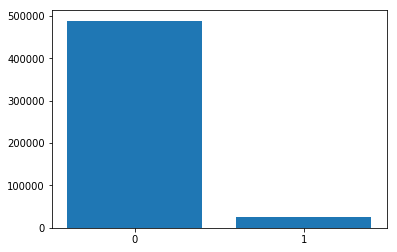

In [8]:
zeros = df.TARGET.count() - df.TARGET.sum()
ones = df.TARGET.sum()

print(zeros, ones)
plt.bar(["0", "1"], [zeros, ones])


Unique values : 
 C1        514009
C2            64
C3             3
N1         41280
N2        174054
N3        237938
N4         42917
N5         27573
N6          8139
N7          7537
N8         40539
N9         26504
N10        42915
N11        27552
N12         1104
N13          672
N14          633
N15          415
N16          236
N17          225
N18          565
N19          330
N20          632
N21          416
N22           49
N23           36
TARGET         2
dtype: int64


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 <a list of 27 Text xticklabel objects>)

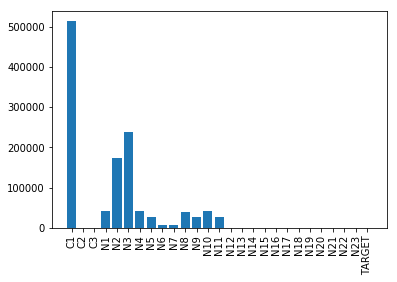

In [9]:
print("\nUnique values : \n",df.nunique())
plt.bar(df.columns, df.nunique().values)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

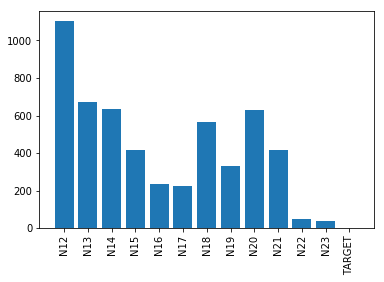

In [10]:
plt.bar(df.columns[14:], df.nunique()[14:])
plt.xticks(rotation="vertical")

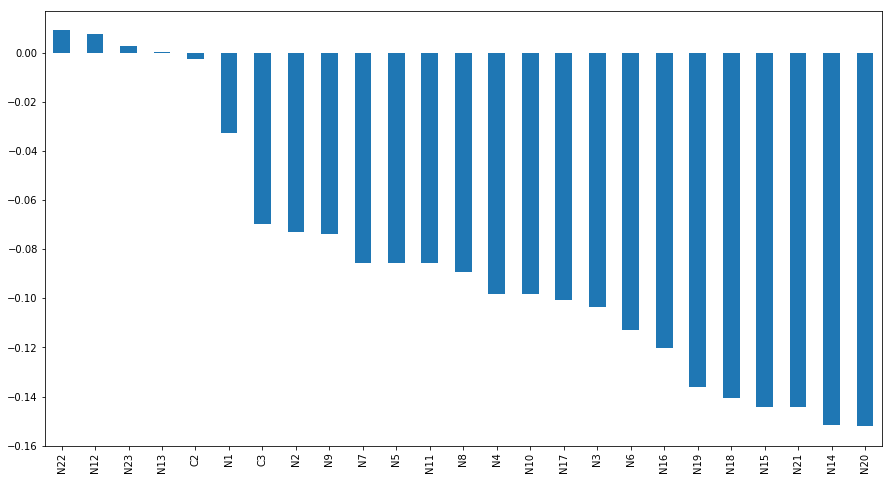

In [11]:
plt.figure(figsize=(15,8))
df.corr()['TARGET'][1:26].sort_values(ascending = False).plot(kind='bar')

In [12]:
df = df.drop("C1", axis=1)

In [13]:
df.drop_duplicates(keep = "first", inplace = True)

In [14]:
df.shape

(492956, 26)

<BarContainer object of 2 artists>

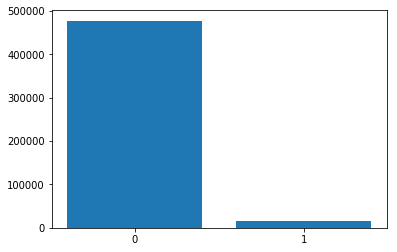

In [15]:
plt.bar(["0", "1"], df['TARGET'].value_counts())

In [16]:
df['C2'].unique()

array([323531, 343835, 343433, 313435, 343439,   3434, 333538, 343637,
         3234, 323137, 343834, 313931, 343139, 313438, 343038, 313339,
       313430, 343138, 343836, 343039, 323233, 343530, 313436, 343838,
       313434, 343230,   3230, 343638, 343438, 333837, 343636, 343232,
       343037,   3438, 343130,   3138, 313738, 353032, 333539, 313739,
       343030, 333631, 313736, 313437, 333537, 353036, 313137, 313333,
       333633,   3631, 313737, 313335, 313439, 313337,   3437, 313331,
       343634, 313138, 323530, 343031,   3330, 313433, 353031, 343336],
      dtype=int64)

In [17]:
df

,C2,C3,N1,N2,N3,N4,N5,N6,N7,N8,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,24.83,...,7,0,0,36,7,36,7,0,0,0
1,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,206.03,...,18,5,6,52,12,57,18,0,0,0
2,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,38.80,...,24,18,6,46,18,64,24,0,0,0
3,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,120.07,...,57,4,1,142,56,148,57,0,0,0
4,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,373.27,...,28,17,5,69,23,86,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513994,323233,31,0.00,0.00,0.00,0.00,46.90,0.00,0.00,0.00,...,4,0,0,0,4,0,4,0,0,0
513996,343433,33,0.00,0.00,0.00,0.00,40.85,0.00,0.00,0.00,...,4,0,0,0,4,0,4,0,0,0
513997,343637,33,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
513998,313339,31,0.00,0.05,0.00,0.32,0.00,0.00,0.00,0.32,...,0,0,0,1,0,1,0,0,0,1


## Building a model

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
X = df.drop('TARGET', axis=1)
y= df['TARGET']

### Normalization

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Feature Selection

In [21]:
X = pd.DataFrame(X_min_max,columns = df.drop('TARGET',axis=1).columns)
y = df['TARGET']

### Chi test

In [86]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.drop('TARGET',axis=1).columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(15,'Score'))

   Specs        Score
21   N20  1010.954507
15   N14  1007.924552
19   N18   801.027564
22   N21   647.322029
16   N15   646.163323
20   N19   415.147161
11   N10   407.466715
5     N4   406.559968
9     N8   375.345043
17   N16   316.737543
7     N6   284.154746
4     N3   247.055424
12   N11   181.146955
6     N5   180.954022
18   N17   159.727503


In [93]:
features = featureScores.nlargest(15,'Score')['Specs'].values

### RF feature importances

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9645305907172996


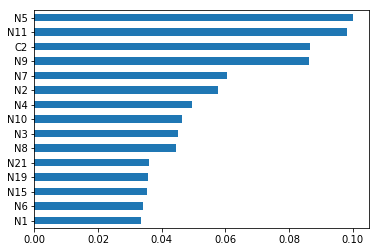

In [26]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')

In [27]:
features = weights.sort_values()[-15:].index

In [28]:
features

Index(['N1', 'N6', 'N15', 'N19', 'N21', 'N8', 'N3', 'N10', 'N4', 'N2', 'N7',
       'N9', 'C2', 'N11', 'N5'],
      dtype='object')

In [29]:
X = X[features]

## Sampling

In [29]:
from sklearn.utils import resample

In [30]:
df_new = pd.DataFrame(X)
df_new['TARGET'] = y

In [31]:
df_new.drop_duplicates(keep = 'first', inplace=True)

In [32]:
df_new.shape

(490964, 16)

In [33]:
df_majority = df_new[df_new.TARGET==0]
df_minority = df_new[df_new.TARGET==1]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,
                                 n_samples=25000,
                                 random_state=123)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.TARGET.value_counts()

0.0    25000
1.0    14982
Name: TARGET, dtype: int64

In [49]:
df_downsampled = df_downsampled.reset_index()

## Building Models

In [50]:
X = df_downsampled.drop('TARGET',axis=1)
y = df_downsampled['TARGET']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions
preds_rf = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, preds_rf))
print(confusion_matrix(y_test,preds_rf))

C:\Users\dnurymzhan001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9639524505030834
[[94954   472]
 [ 3082    84]]


### SVM

In [33]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear') 
model_svm.fit(X_train,y_train)
preds_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, preds_svm)

0.9678878610840637

In [34]:
print(confusion_matrix(y_test,preds_svm))

[[95426     0]
 [ 3166     0]]


### AdaBoost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
model_abc = AdaBoostClassifier()
model_abc.fit(X_train,y_train)
preds_abc = model_abc.predict(X_test)

[[95426     0]
 [ 3166     0]]


In [37]:
print(metrics.accuracy_score(y_test, preds_abc))
print(confusion_matrix(y_test,preds_abc))

0.9678878610840637
[[95426     0]
 [ 3166     0]]


### XGBoost

In [36]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
preds_xgb = model_xgb.predict(X_test)

[[95426     0]
 [ 3166     0]]


In [38]:
print(metrics.accuracy_score(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))

0.9678878610840637
[[95426     0]
 [ 3166     0]]


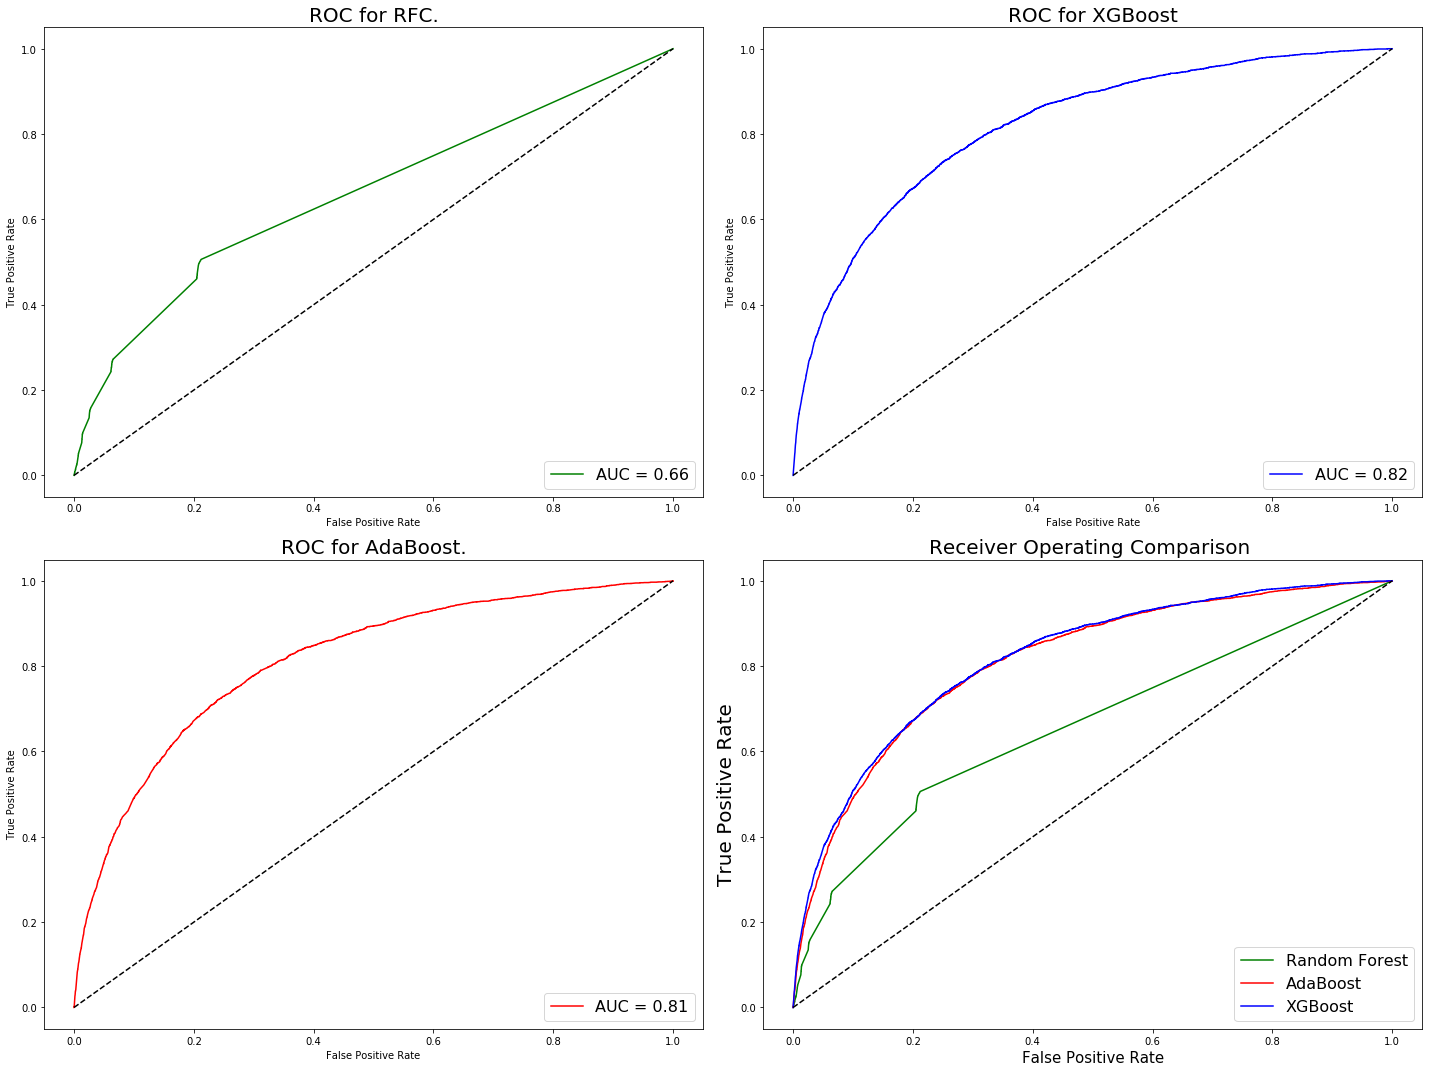

In [45]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

from sklearn import metrics

#Random forest
rfc_prob = model_rf.predict_proba(X_test)[:,1]
fprRfc, tprRfc, thresholdsRfc = metrics.roc_curve(y_test, rfc_prob)
roc_auc_rfc = metrics.auc(fprRfc,tprRfc)
ax_arr[0,0].plot(fprRfc, tprRfc,'b',label = 'AUC = %0.2f' % roc_auc_rfc,color = 'green')
ax_arr[0,0].plot([0, 1], [0, 1], 'k--')
ax_arr[0,0].set_xlabel('False Positive Rate')
ax_arr[0,0].set_ylabel('True Positive Rate')
ax_arr[0,0].set_title('ROC for RFC.', fontsize = 20)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#AdaBoost
knn_prob = model_abc.predict_proba(X_test)[:,1]
fprknn, tprknn, thresholdsgbc = metrics.roc_curve(y_test, knn_prob)
roc_auc_gbc = metrics.auc(fprknn,tprknn)
ax_arr[1,0].plot(fprknn, tprknn,'b',label = 'AUC = %0.2f' % roc_auc_gbc,color = 'red')
ax_arr[1,0].plot([0, 1], [0, 1], 'k--')
ax_arr[1,0].set_xlabel('False Positive Rate')
ax_arr[1,0].set_ylabel('True Positive Rate')
ax_arr[1,0].set_title('ROC for AdaBoost.', fontsize = 20)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#XGBoost
lr_prob = model_xgb.predict_proba(X_test)[:,1]
fprLr, tprLr, thresholdsLr = metrics.roc_curve(y_test, lr_prob)
roc_auc_lr = metrics.auc(fprLr,tprLr)
ax_arr[0,1].plot(fprLr, tprLr,'b',label = 'AUC = %0.2f' % roc_auc_lr,color = 'blue')
ax_arr[0,1].plot([0, 1], [0, 1], 'k--')
ax_arr[0,1].set_xlabel('False Positive Rate')
ax_arr[0,1].set_ylabel('True Positive Rate')
ax_arr[0,1].set_title('ROC for XGBoost', fontsize = 20)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#For All
ax_arr[1,1].plot(fprRfc,tprRfc, label ='Random Forest', color = 'green')
ax_arr[1,1].plot(fprknn,tprknn, label ='AdaBoost', color = 'red')
ax_arr[1,1].plot(fprLr,tprLr, label ='XGBoost', color = 'blue')
ax_arr[1,1].plot([0, 1], [0, 1], 'k--')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 
plt.show()

# Проделанная работа и над чем стоит поработать в будущем